In [121]:
import shutil
import tempfile
import urllib.request
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd


In [36]:
base_url = 'https://vidyutpravah.in'

In [34]:
def read_link(link):
    with urllib.request.urlopen(link) as response:
        with tempfile.NamedTemporaryFile(delete=False) as tmp_file:
            shutil.copyfileobj(response, tmp_file)
    return tmp_file

In [124]:
def parse_page(tmp_file):
    with open(tmp_file.name) as html:
        contents = html.read()
        return BeautifulSoup(contents)

In [125]:
def get_state_level_links():
    tmp_file = read_link(base_url)
    state_with_links = []

    with open(tmp_file.name) as html:
        contents = html.read()
        doc = parse_page(tmp_file)
        for link in doc.find_all("a", class_="state-names_en"):
            state_with_links.append((link.get_text().strip(), link.attrs["href"]))

    return state_with_links

In [126]:
state_with_links = get_state_level_links()

In [49]:
tempfiles = []
for state, link in state_with_links:
    tempfiles.append(read_link(base_url + link))

In [87]:
states = [state for state, _ in state_with_links]

def extract_energy_demand(tempfiles, states):
    state_with_demand = {
        "states": [],
        "demands": []
    }
    for state, tmp_file in zip(states, tempfiles):
        doc = parse_page(tmp_file)
        for span in doc.find_all("span", class_="value_PrevDemandMET_en"):
            demand = span.findChild("span").get_text()
            demand = demand.replace("MW", "").replace(",", "").strip()
            state_with_demand["states"].append(state)
            state_with_demand["demands"].append(int(demand))

    return state_with_demand

In [127]:
demand_data = extract_energy_demand(tempfiles, states)

In [94]:
df = pd.DataFrame.from_dict(data)

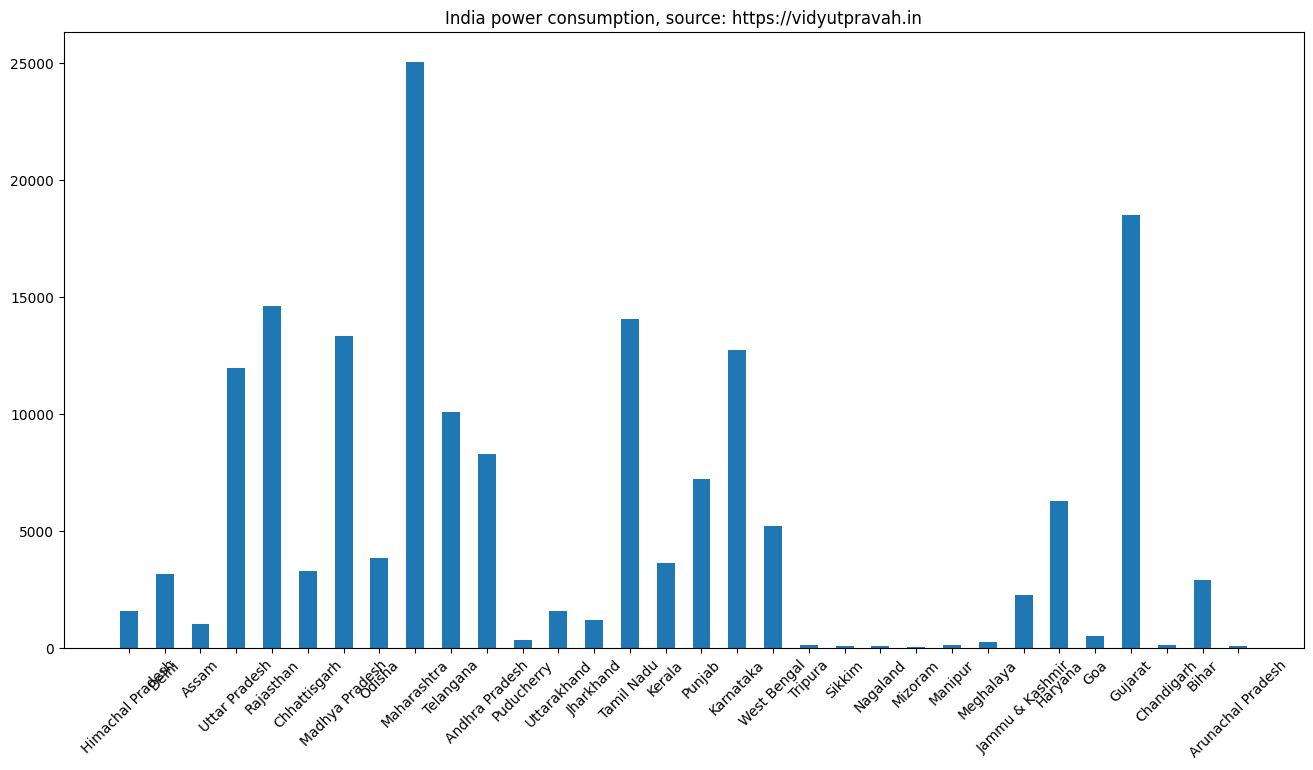

In [120]:
plt.figure(figsize=(16,8))
plt.title("India power consumption, source: " + base_url)
plt.bar(df["states"], df["demands"], 0.5)
plt.xlabel ="MW"
plt.xticks(rotation=45)
plt.show()